<img src="https://courses.edx.org/asset-v1:ACCA+ML001+2T2021+type@asset+block@acca-logo.jpg" alt="ACCA logo" style="width: 400px;"/>

# Python for data analysis
## Part 5 - Exercises - `Solutions` ✅

* **Course:** __Machine learning with Python for finance professionals__ by ACCA
* **Instructor:** [Coefficient](https://coefficient.ai) / [@CoefficientData](https://twitter.com/CoefficientData)

---

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

> ### 🚩 Exercise 1
> So far we've been working with only 2019 data. Let's now read in the full Dream Destination dataset containing 66k orders across a ten year period from 2010-2019.
> 
> 1. Using `pd.read_excel()` read in the `"Order Database"` sheet from the file `"Hotel Industry - Order and Finance Database.xlsx"`.
> 2. As before, assign it to a variable called `orders`.
> 
> Tips:
> - Make sure you read in the correct file. This file contains a lot more data!
> - It may take a little while to read in the file from Excel format, but once it's read into pandas you'll find calculations and analysis in pandas is lightning fast compared to doing the same in Excel.

In [2]:
# ✅ SOLUTION

# Read in the Dream Destination hotel data
orders = pd.read_excel("Hotel Industry - Order and Finance Database.xlsx",
                       sheet_name="Order Database")
orders.head(3)

,Booking ID,Date of Booking,Year,Time,Customer ID,Gender,Age,Origin Country,State,Location,Destination Country,Destination City,No. Of People,Check-in date,No. Of Days,Check-Out Date,Rooms,Hotel Name,Hotel Rating
0,DDMY00001,2010-01-01,2010,10:49:40,MY00001,Male,42,Malaysia,Johor,Iskandar Puteri,Denmark,Horsens,1,2010-01-12,8,2010-01-20,1,Hotel Triton,4.3
1,DDID00002,2010-01-01,2010,09:19:47,ID00001,Female,44,Indonesia,Ciawi,West Java,Colombia,Medellin,3,2010-01-21,1,2010-01-22,2,Enchanted Isle,4.2
2,DDSG00003,2010-01-01,2010,11:52:56,SG00001,Female,31,Singapore,Central,Rochor,Germany,Munich,3,2010-01-02,7,2010-01-09,2,Seacoast Hotel,4.5


---

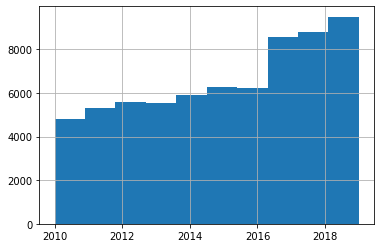

In [3]:
# Let's visualise how many orders there are by year (this should be pretty fast!)
orders.Year.hist();

---

> ### 🚩 Exercise 2
> 
> Read in the `"Finance Database"` sheet from the same Excel file, and assign it to a variable called `finance`.

In [4]:
# ✅ SOLUTION

finance = pd.read_excel("Hotel Industry - Order and Finance Database.xlsx",
                       sheet_name="Finance Database")
finance.head(3)

,Booking ID,Date of Booking,Year,Time,Customer ID,Origin Country,State,Location,Payment Mode,Bank Name,No. Of Days,Rooms,Booking Price[SGD],Discount,GST,Profit Margin
0,DDMY00001,2010-01-01,2010,10:49:40,MY00001,Malaysia,Johor,Iskandar Puteri,Wallet,United Overseas Bank (UOB),8,1,243,0.01,0.07,0.25
1,DDID00002,2010-01-01,2010,09:19:47,ID00001,Indonesia,Ciawi,West Java,Wallet,EZ-Link,1,2,312,0.00,0.07,0.24
2,DDSG00003,2010-01-01,2010,11:52:56,SG00001,Singapore,Central,Rochor,Credit Card,Grab,7,2,338,0.19,0.07,0.20


---

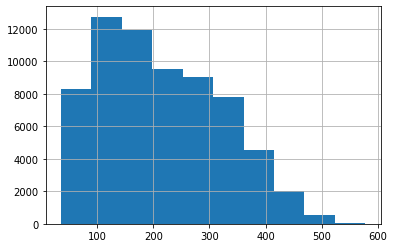

In [5]:
# What's the distribution of Booking Price (in SGD)?
finance['Booking Price[SGD]'].hist();

We'd like to join `orders` and `finance` into a single dataframe, but first we must eliminate columns that appear in both databases.

In [6]:
set(orders.columns) - set(finance.columns)

{'Age',
 'Check-Out Date',
 'Check-in date',
 'Destination City',
 'Destination Country',
 'Gender',
 'Hotel Name',
 'Hotel Rating',
 'No. Of People'}

In [7]:
# Some neat set logic to determine "which columns are in finance but not in orders?"
finance_only_cols = set(finance.columns) - set(orders.columns)
finance_only_cols

{'Bank Name',
 'Booking Price[SGD]',
 'Discount',
 'GST',
 'Payment Mode',
 'Profit Margin'}

In [8]:
# We will reduce the finance table to only columns unique to this table plus Booking ID (to join on).
finance = finance[['Booking ID'] + list(finance_only_cols)]
finance.head(3)

,Booking ID,GST,Bank Name,Discount,Booking Price[SGD],Payment Mode,Profit Margin
0,DDMY00001,0.07,United Overseas Bank (UOB),0.01,243,Wallet,0.25
1,DDID00002,0.07,EZ-Link,0.00,312,Wallet,0.24
2,DDSG00003,0.07,Grab,0.19,338,Credit Card,0.20


---

> ### 🚩 Exercise 3
> 
> Join the `orders` dataframe to the `finance` dataframe using a left join on `Booking ID`. Assign the resulting merged data to a variable called `df`.
> 
> Use `len(df)` to calculate how many rows are in the combined table.

In [9]:
# ✅ SOLUTION

df = pd.merge(left=orders, right=finance, on='Booking ID', how='left')

In [10]:
len(df)

66535

In [11]:
df.columns

Index(['Booking ID', 'Date of Booking', 'Year', 'Time', 'Customer ID',
       'Gender', 'Age', 'Origin Country', 'State', 'Location',
       'Destination Country', 'Destination City', 'No. Of People',
       'Check-in date', 'No. Of Days', 'Check-Out Date', 'Rooms', 'Hotel Name',
       'Hotel Rating', 'GST', 'Bank Name', 'Discount', 'Booking Price[SGD]',
       'Payment Mode', 'Profit Margin'],
      dtype='object')

In [12]:
df.head()

,Booking ID,Date of Booking,Year,Time,Customer ID,Gender,Age,Origin Country,State,Location,...,Check-Out Date,Rooms,Hotel Name,Hotel Rating,GST,Bank Name,Discount,Booking Price[SGD],Payment Mode,Profit Margin
0,DDMY00001,2010-01-01,2010,10:49:40,MY00001,Male,42,Malaysia,Johor,Iskandar Puteri,...,2010-01-20,1,Hotel Triton,4.3,0.07,United Overseas Bank (UOB),0.01,243,Wallet,0.25
1,DDID00002,2010-01-01,2010,09:19:47,ID00001,Female,44,Indonesia,Ciawi,West Java,...,2010-01-22,2,Enchanted Isle,4.2,0.07,EZ-Link,0.00,312,Wallet,0.24
2,DDSG00003,2010-01-01,2010,11:52:56,SG00001,Female,31,Singapore,Central,Rochor,...,2010-01-09,2,Seacoast Hotel,4.5,0.07,Grab,0.19,338,Credit Card,0.20
3,DDSG00004,2010-01-01,2010,13:44:40,SG00002,Male,28,Singapore,North,Yishun,...,2010-02-19,2,Night In Paradise,4.2,0.07,DBS Paylah,0.19,254,Debit Card,0.13
4,DDKH00005,2010-01-01,2010,05:38:26,KH00001,Male,44,Cambodia,Phnom Trop,Pursat,...,2010-01-06,3,Tiny Digs Hotel,4.6,0.07,Bank of Singapore (BOS),0.15,313,Wallet,0.17


---
> ### 🚩 Exercise 4
> 
> **Create calculated columns** as follows:
> 
> **`Total Booking Amount`**` = Rooms * No. Of Days * Booking Price[SGD]`
> 
> **`Discount Amount`**` = Rooms * No. Of Days * Booking Price[SGD] * Discount`
> 
> **`Net Sales`**` = Total Booking Amount - Discount Amount`
> 
> **`Gross Sales`**` = Net Sales * 1 + GST`
> 
> **`Revenue`**` = Net Sales * Profit Margin`

In [13]:
# Remember you can easily create columns from other columns
df['People Per Room'] = df['No. Of People'] / df['Rooms']

---

In [14]:
# ✅ SOLUTIONS

In [15]:
df['Total Booking Amount'] = df['Rooms'] * df['No. Of Days'] * df['Booking Price[SGD]']

In [16]:
df[['Rooms', 'No. Of Days', 'Booking Price[SGD]', 'Total Booking Amount']].head(3)

,Rooms,No. Of Days,Booking Price[SGD],Total Booking Amount
0,1,8,243,1944
1,2,1,312,624
2,2,7,338,4732


In [17]:
df['Discount Amount'] = df['Rooms'] * df['No. Of Days'] * df['Booking Price[SGD]'] * df['Discount']

In [18]:
df[['Rooms', 'No. Of Days', 'Booking Price[SGD]', 'Discount', 'Total Booking Amount', 'Discount Amount']].head(3)

,Rooms,No. Of Days,Booking Price[SGD],Discount,Total Booking Amount,Discount Amount
0,1,8,243,0.01,1944,19.44
1,2,1,312,0.00,624,0.00
2,2,7,338,0.19,4732,899.08


In [19]:
df['Net Sales'] = df['Total Booking Amount'] - df['Discount Amount']

In [20]:
df[['Total Booking Amount', 'Discount Amount', 'Net Sales']].head(3)

,Total Booking Amount,Discount Amount,Net Sales
0,1944,19.44,1924.56
1,624,0.00,624.00
2,4732,899.08,3832.92


In [21]:
df['Gross Sales'] = df['Net Sales'] * (1 + df['GST'])

In [22]:
df[['Total Booking Amount', 'Discount Amount', 'Net Sales', 'GST', 'Gross Sales']].head(3)

,Total Booking Amount,Discount Amount,Net Sales,GST,Gross Sales
0,1944,19.44,1924.56,0.07,2059.2792
1,624,0.00,624.00,0.07,667.6800
2,4732,899.08,3832.92,0.07,4101.2244


In [23]:
df['Revenue'] = df['Net Sales'] * df['Profit Margin']

---

In [24]:
# This should run without error, and display your newly calculated columns.
df[['Total Booking Amount', 'Discount Amount', 'Net Sales', 'GST', 'Gross Sales', 'Profit Margin', 'Revenue']].head(3)

,Total Booking Amount,Discount Amount,Net Sales,GST,Gross Sales,Profit Margin,Revenue
0,1944,19.44,1924.56,0.07,2059.2792,0.25,481.140
1,624,0.00,624.00,0.07,667.6800,0.24,149.760
2,4732,899.08,3832.92,0.07,4101.2244,0.20,766.584


---
> ### 🚩 Exercise 5
> 
> Create a Seaborn barplot showing Total Booking Amount (x-axis) by Origin Country (y-axis).
> 
> Tips:
> - Don't forget to use `data=df`
> - You will also want `estimator=sum` otherwise it will calculate the average "Total Booking Amount" by country.

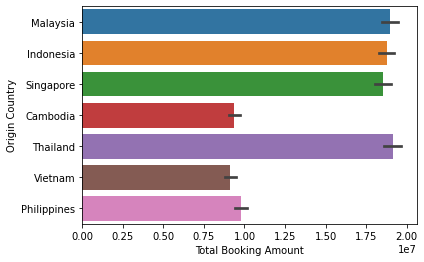

In [25]:
# ✅ SOLUTION

sns.barplot(x='Total Booking Amount', y='Origin Country', estimator=sum, data=df);

You should see that the company receives the most bookings from Thailand, followed by Malaysia, Indonesia and Singapore.

---
> ### 🚩 Exercise 6
> 
> Create a dataframe called `revenue_state` by doing the following:
> 1. Groupby both `Origin Country` and `State`
> 2. Calculate the sum of the Revenue column
> 3. Reset the index

In [26]:
# ✅ SOLUTION

revenue_state = (
    df
    .groupby(['Origin Country', 'State'])
    .Revenue
    .sum()
    .reset_index()
)
revenue_state

,Origin Country,State,Revenue
0,Cambodia,Andong Teuk,33696.9409
1,Cambodia,Angkor Borei,34088.3539
2,Cambodia,Angkor Chum,35023.4886
3,Cambodia,Bak Khlang,41029.9293
4,Cambodia,Bakan,39717.5700
...,...,...,...
214,Vietnam,Tam Ky,52506.1031
215,Vietnam,Thach Thanh,58444.7716
216,Vietnam,Thai Nguyen,54403.8933
217,Vietnam,Tuy Phong,52797.3589


---
> ### 🚩 Exercise 7
> 
> Create a dataframe called `top_states` by doing the following:
> 1. Use your `revenue_state` dataframe, and sort it by `Revenue` descending (`ascending=False`)
> 2. Group by just `Origin Country`
> 3. Then call just `.head(3)`, this will select the top 3 states for each country (neat trick!)

In [27]:
# ✅ SOLUTION

top_states = (
    revenue_state
    .sort_values('Revenue', ascending=False)
    .groupby('Origin Country')
    .head(3)
)
top_states

,Origin Country,State,Revenue
168,Singapore,Central,1.212189e+06
172,Singapore,West,6.583602e+05
126,Malaysia,Johor,4.992565e+05
129,Malaysia,Penang,4.841925e+05
132,Malaysia,Sarawak,4.710899e+05
170,Singapore,North,4.264580e+05
176,Thailand,Chonburi,3.476852e+05
181,Thailand,Nonthaburi,2.334670e+05
189,Thailand,Songkhla,2.302631e+05
145,Philippines,Cebu,1.764086e+05


---

In [28]:
# Let's re-sort top_states by Country then Revenue ready for the next exercise.
top_states = top_states.sort_values(
    by=['Origin Country', 'Revenue'],
    ascending=[True, False]
)

top_states.head(10)

,Origin Country,State,Revenue
5,Cambodia,Bar Yakha,49357.4712
16,Cambodia,Kor,45493.8839
38,Cambodia,Thma Bang,42084.0994
125,Indonesia,Yogyakarta,50887.1065
123,Indonesia,Tuban,50752.0634
122,Indonesia,Torere,47339.8736
126,Malaysia,Johor,499256.4858
129,Malaysia,Penang,484192.5044
132,Malaysia,Sarawak,471089.8885
145,Philippines,Cebu,176408.5628


---
> ### 🚩 Exercise 8
> 
> Create a horizontal barplot using Seaborn that shows **total revenue by country and state**:
> 1. Put `Revenue` on the x-axis and `State` on the y-axis, with `data=top_states`
> 2. Add `hue='Origin Country'`
> 3. Don't forget `orient='h'` for a horizontal bar plot.
> 4. Add `dodge=False` to make it look neater (Can you figure out what dodge is doing here? What do the docs say?)
> 5. Finally, add `plt.figure(figsize=(15,10))` on it's own line for a larger plot size.

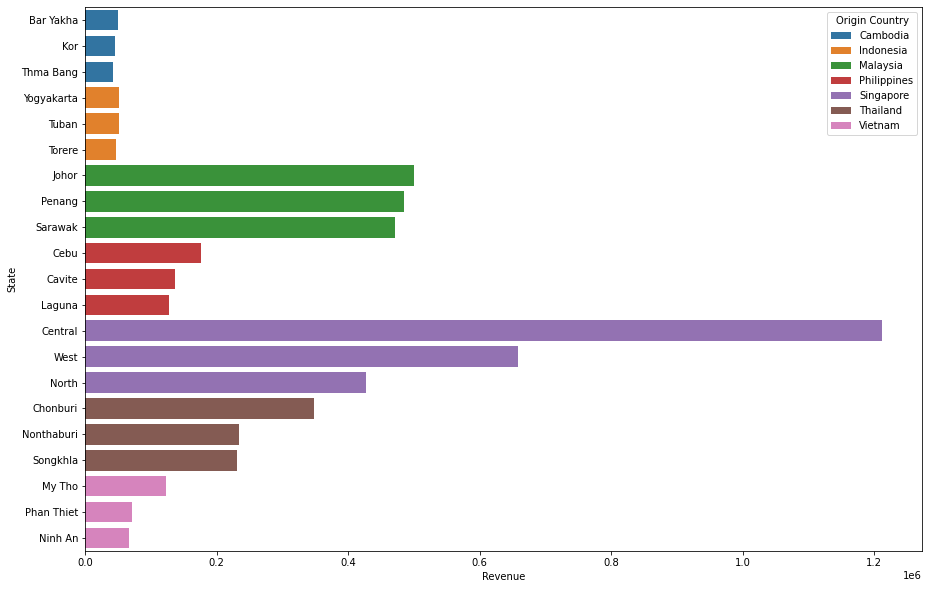

In [29]:
# ✅ SOLUTION

plt.figure(figsize=(15,10))
sns.barplot(
    x='Revenue',
    y='State',
    hue='Origin Country',
    dodge=False,
    orient='h',
    data=top_states
);

---
<div class="alert alert-block alert-success">
<b>🎉 Congratulations</b><br>
You have reached the end of these exercises.
</div>

---